In [ ]:
#Link drive data https://drive.google.com/drive/folders/1lJxum2i6zjYJYfjCEWS8SGGzvFWJxN4D?usp=sharing

In [1]:
import numpy as np
#Tạo mảng kết quả
name = np.zeros((80,1), dtype=np.uint8)
#0 đến 19 là
for i in range(0,20):
  name[i][::] = 0
#20 đến 39 là 
for i in range(0,20):
  name[i+20][::] = 1
#40 đến 59 là
for i in range(0,20):
  name[i+40][::] = 2
#60 đến 79 là
for i in range(0,20):
  name[i+60][::] = 3

In [3]:
import cv2
import matplotlib.pyplot as plt
#Chuyển ảnh 150x150 sang mảng dữ liệu
data = np.zeros((80,150,150), dtype=np.uint8)
#0 đến 19 là 
for i in range(0,20):
  filename = "/content/drive/MyDrive/DATA/amazing"+str(i)+".jpg"    
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  data[i][::][::] = img
#20 đến 39 là 
for i in range(0,20):
  filename = "/content/drive/MyDrive/DATA/angry"+str(i)+".jpg"  
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  data[i+20][::][::] = img
#40 đến 59 là 
for i in range(0,20):
  filename = "/content/drive/MyDrive/DATA/happy"+str(i)+".jpg"  
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  data[i+40][::][::] = img
#60 đến 79 là 
for i in range(0,20):
  filename = "/content/drive/MyDrive/DATA/sad"+str(i)+".jpg"  
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  data[i+60][::][::] = img

In [4]:
from keras.utils import np_utils
x_train=data
y_train=name
x_train = x_train.astype('float32')
x_train/=255
y_train = np_utils.to_categorical(y_train,4)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(150,150,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 1, epochs = 100,verbose = 1)

Epoch 1/100
80/80 [==============================] - 1s 5ms/step - loss: 1.0212 - accuracy: 0.5625
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.8795 - accuracy: 0.6000
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7822 - accuracy: 0.6875
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.7125
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7226 - accuracy: 0.7250
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7854 - accuracy: 0.6875
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.7500
Epoch 8/100
80/80 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.6000
Epoch 9/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7461 - accuracy: 0.7125
Epoch 10/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7750
Epoch 11/

['sad']


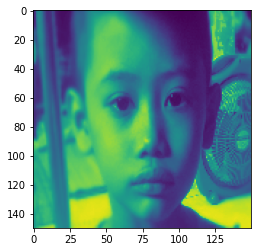

In [33]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
emotion=[['amazing'],['angry'],['happy'],['sad']]
img=load_img('/content/drive/MyDrive/DATA/test1.jpg',color_mode="grayscale",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150)
img=img.astype('float32')
img=img/255.0
print(emotion[np.argmax(model.predict(img))])

In [34]:
model.save('kiemtra.h5')